In [3]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import networkx as nx
import ast
import Influencer_Characteristics as ic
import File_Opening as fo

In [4]:
dfins_en = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Ins_lingua_en_disclosed_ad.csv')
dfins_nl = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Ins_lingua_nl_disclosed_ad.csv')
dftt_en = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\TikTok_lingua_en_disclosed_ad.csv')
dftt_nl = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\TikTok_lingua_nl_disclosed_ad.csv')
dfyt_en = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Youtube_lingua_en_disclosed_ad.csv')
dfyt_nl = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Youtube_lingua_nl_disclosed_ad.csv')

In [5]:
insinf_en = fo.get_unique_values(dfins_en, "username")
insinf_nl = fo.get_unique_values(dfins_nl, "username")
ttinf_en = fo.get_unique_values(dftt_en, "username")
ttinf_nl = fo.get_unique_values(dftt_nl, "username")
ytinf_en = fo.get_unique_values(dfyt_en, "channel_title")
ytinf_nl = fo.get_unique_values(dfyt_nl, "channel_title")

In [121]:
dfyt_en["video_id"].to_csv('dfyt_en_index_ad.csv', index=False)
dfyt_nl["video_id"].to_csv('dfyt_nl_index_ad.csv', index=False)
dftt_en["id"].to_csv('dftt_en_index_ad.csv', index=False)
dftt_nl["id"].to_csv('dftt_nl_index_ad.csv', index=False)
dfins_en["ct_id"].to_csv('dfins_en_index_ad.csv', index=False)
dfins_nl["ct_id"].to_csv('dfins_nl_index_ad.csv', index=False)

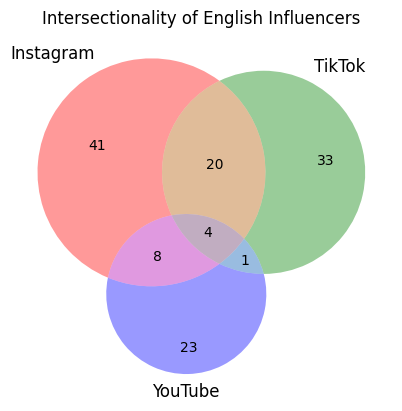

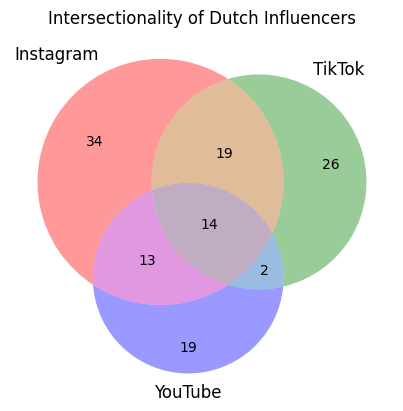

In [5]:
fo.find_common_elements_and_plot(insinf_en, ttinf_en, ytinf_en, "Instagram", "TikTok", "YouTube","Intersectionality of English Influencers")
fo.find_common_elements_and_plot(insinf_nl, ttinf_nl, ytinf_nl, "Instagram", "TikTok", "YouTube","Intersectionality of Dutch Influencers")

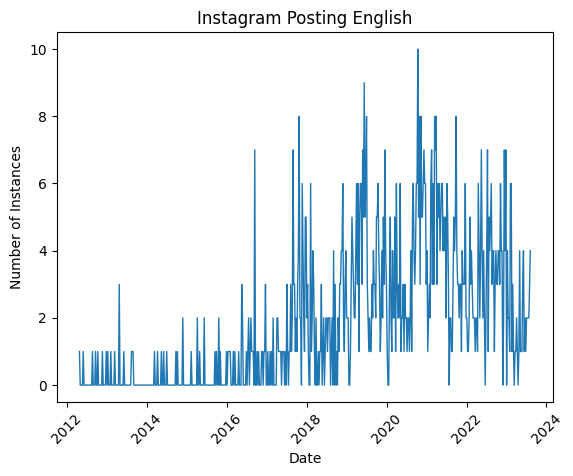

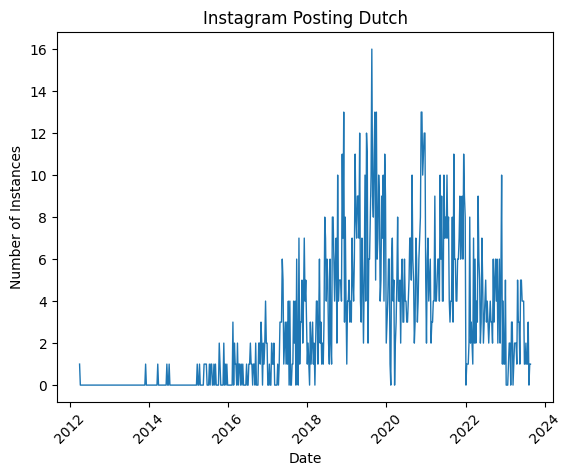

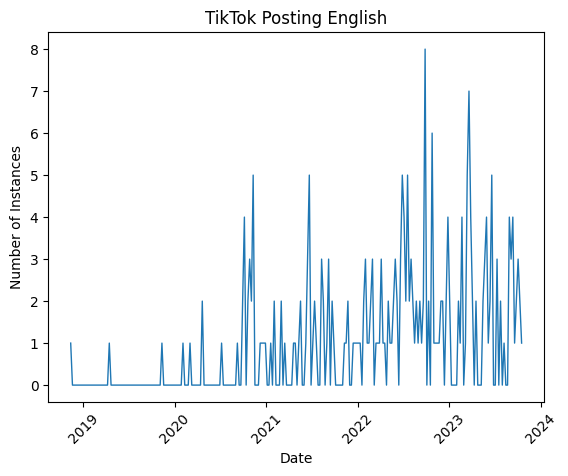

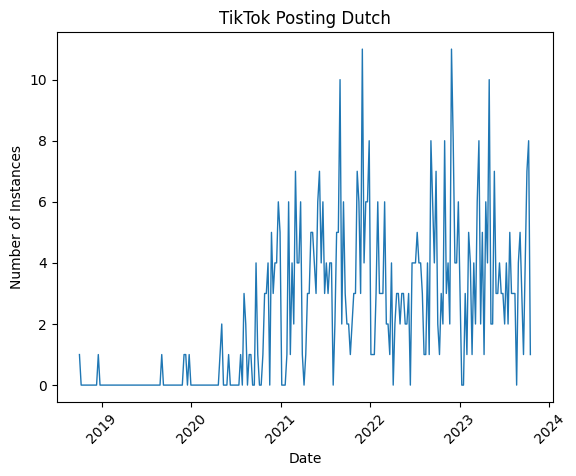

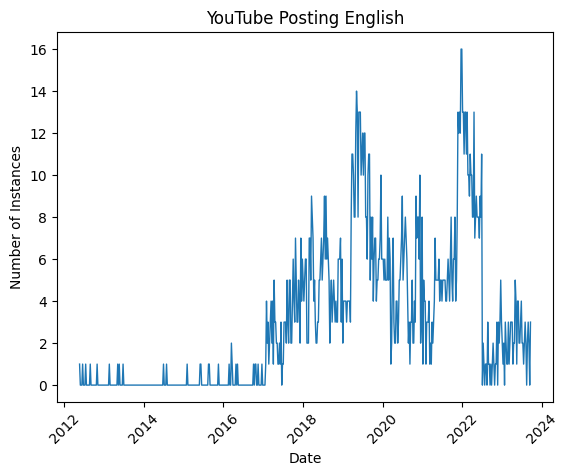

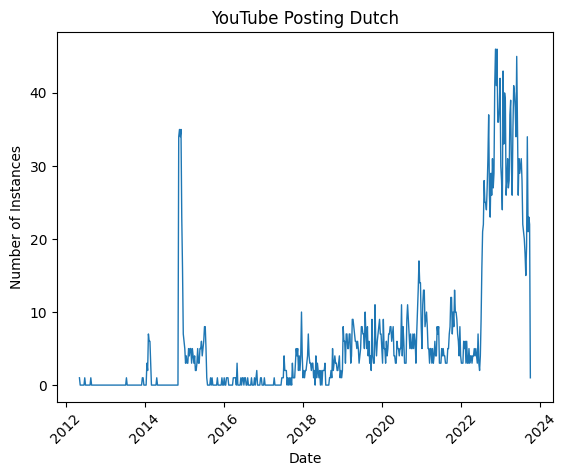

In [7]:
fo.plot_instances_by_week(dfins_en,"date", "Instagram Posting English")
fo.plot_instances_by_week(dfins_nl,"date", "Instagram Posting Dutch")
fo.plot_instances_by_week(dftt_en,"create_time", "TikTok Posting English")
fo.plot_instances_by_week(dftt_nl,"create_time", "TikTok Posting Dutch")
fo.plot_instances_by_week(dfyt_en,"published_at_video", "YouTube Posting English")
fo.plot_instances_by_week(dfyt_nl,"published_at_video", "YouTube Posting Dutch")

In [ ]:
fo.plot_instances_together(dfins_en,dftt_en,dfyt_en,"date","create_time","published_at_video","Instagram","TikTok","YouTube","Evolution of Posting per Week English")
fo.plot_instances_together(dfins_nl,dftt_nl,dfyt_nl,"date","create_time","published_at_video","Instagram","TikTok","YouTube","Evolution of Posting per Week Dutch")

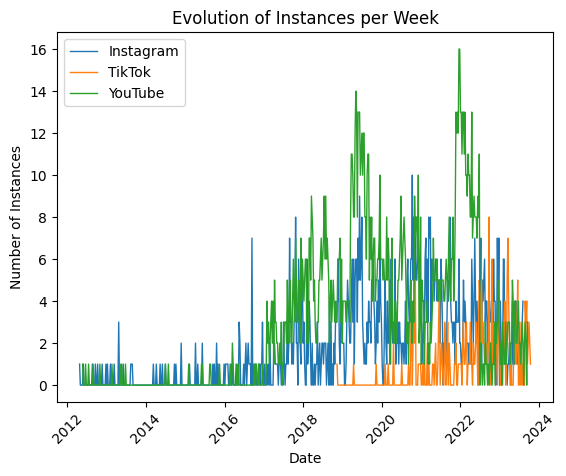

In [104]:
# Convert to datetime format for each DataFrame
dfins_en['date'] = pd.to_datetime(dfins_en['date'])
dftt_en['create_time'] = pd.to_datetime(dftt_en['create_time'])
dfyt_en['published_at_video'] = pd.to_datetime(dfyt_en['published_at_video'])

# Group by the week and count instances for each week for each DataFrame
count_by_week1 = dfins_en.resample('W-Mon', on='date').size().reset_index(name='count1')
count_by_week2 = dftt_en.resample('W-Mon', on='create_time').size().reset_index(name='count2')
count_by_week3 = dfyt_en.resample('W-Mon', on='published_at_video').size().reset_index(name='count3')

# Plot each DataFrame separately
plt.plot(count_by_week1['date'], count_by_week1['count1'], label='Instagram', linestyle='-', linewidth=1)
plt.plot(count_by_week2['create_time'], count_by_week2['count2'], label='TikTok', linestyle='-', linewidth=1)
plt.plot(count_by_week3['published_at_video'], count_by_week3['count3'], label='YouTube', linestyle='-', linewidth=1)

# Customize the plot if needed
plt.title('Evolution of Instances per Week')
plt.xlabel('Date')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.show()


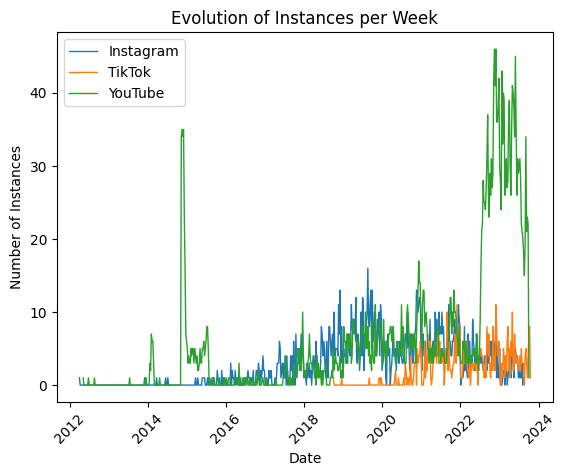

In [105]:
# Convert to datetime format for each DataFrame
dfins_nl['date'] = pd.to_datetime(dfins_nl['date'])
dftt_nl['create_time'] = pd.to_datetime(dftt_nl['create_time'])
dfyt_nl['published_at_video'] = pd.to_datetime(dfyt_nl['published_at_video'])

# Group by the week and count instances for each week for each DataFrame
count_by_week1 = dfins_nl.resample('W-Mon', on='date').size().reset_index(name='count1')
count_by_week2 = dftt_nl.resample('W-Mon', on='create_time').size().reset_index(name='count2')
count_by_week3 = dfyt_nl.resample('W-Mon', on='published_at_video').size().reset_index(name='count3')

# Plot each DataFrame separately
plt.plot(count_by_week1['date'], count_by_week1['count1'], label='Instagram', linestyle='-', linewidth=1)
plt.plot(count_by_week2['create_time'], count_by_week2['count2'], label='TikTok', linestyle='-', linewidth=1)
plt.plot(count_by_week3['published_at_video'], count_by_week3['count3'], label='YouTube', linestyle='-', linewidth=1)

# Customize the plot if needed
plt.title('Evolution of Instances per Week')
plt.xlabel('Date')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.show()


In [106]:
# Calculate the time between posts for influencers
timediffins_en = pd.DataFrame({
    "Username": list(insinf_en),
    'Time Difference': [dfins_en[dfins_en['username'] == username]['date'].sort_values().diff().mean() for username in insinf_en]
})

timedifftt_en= pd.DataFrame({
    "Username": list(ttinf_en),
    'Time Difference': [dftt_en[dftt_en['username'] == username]['create_time'].sort_values().diff().mean() for username in ttinf_en]
})

timediffyt_en = pd.DataFrame({
    "Username": list(ytinf_en),
    'Time Difference': [dfyt_en[dfyt_en['channel_title'] == username]['published_at_video'].sort_values().diff().mean() for username in ytinf_en]
})

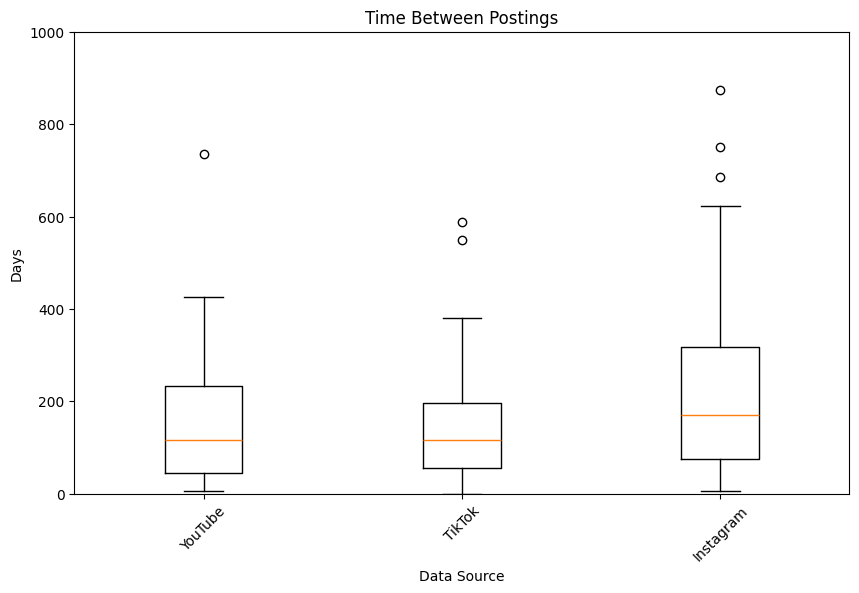

In [107]:

# Combine the data into a list of arrays
data_to_plot = [
    timediffyt_en["Time Difference"].dt.total_seconds().dropna() / (60 * 60 * 24),
    timedifftt_en["Time Difference"].dt.total_seconds().dropna() / (60 * 60 * 24),
    timediffins_en["Time Difference"].dt.total_seconds().dropna() / (60 * 60 * 24)
]

# Create a boxplot for all the data
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=['YouTube', 'TikTok', 'Instagram'])

# Customize the plot
plt.title('Time Between Postings')
plt.xlabel('Data Source')
plt.ylabel('Days')
plt.ylim(0, 1000)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [108]:
# Calculate the time between posts for influencers
timediffins_nl = pd.DataFrame({
    "Username": list(insinf_nl),
    'Time Difference': [dfins_nl[dfins_nl['username'] == username]['date'].sort_values().diff().mean() for username in insinf_nl]
})

timedifftt_nl= pd.DataFrame({
    "Username": list(ttinf_nl),
    'Time Difference': [dftt_nl[dftt_nl['username'] == username]['create_time'].sort_values().diff().mean() for username in ttinf_nl]
})

timediffyt_nl = pd.DataFrame({
    "Username": list(ytinf_nl),
    'Time Difference': [dfyt_nl[dfyt_nl['channel_title'] == username]['published_at_video'].sort_values().diff().mean() for username in ytinf_nl]
})

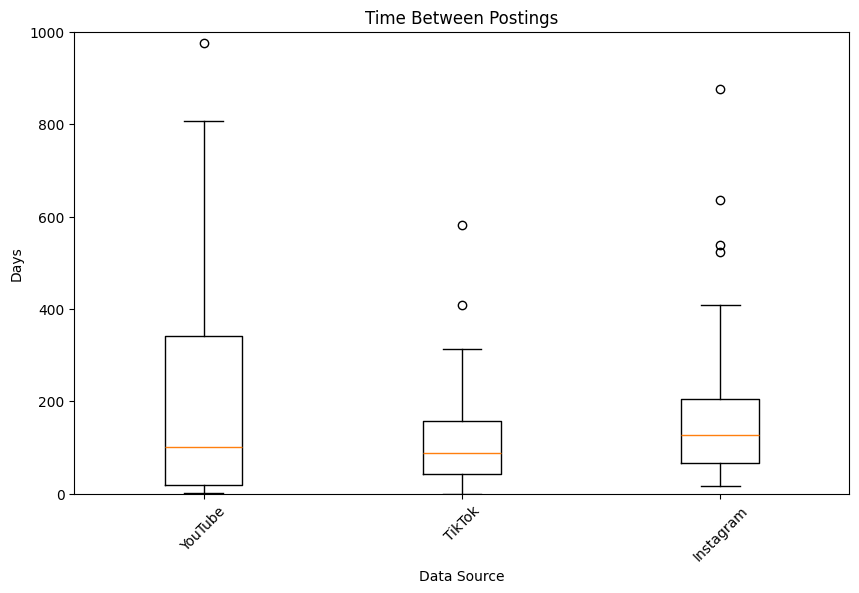

In [109]:

# Combine the data into a list of arrays
data_to_plot = [
    timediffyt_nl["Time Difference"].dt.total_seconds().dropna() / (60 * 60 * 24),
    timedifftt_nl["Time Difference"].dt.total_seconds().dropna() / (60 * 60 * 24),
    timediffins_nl["Time Difference"].dt.total_seconds().dropna() / (60 * 60 * 24)
]

# Create a boxplot for all the data
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=['YouTube', 'TikTok', 'Instagram'])

# Customize the plot
plt.title('Time Between Postings')
plt.xlabel('Data Source')
plt.ylabel('Days')
plt.ylim(0, 1000)
plt.xticks(rotation=45)

# Show the plot
plt.show()

### Network for English Instagram

In [25]:
dfins_en["caption_hashtags"] = dfins_en["caption_hashtags"].apply(lambda x: ast.literal_eval(x) if x else "")
dfinshas_en = dfins_en[dfins_en["caption_hashtags"].apply(lambda x: bool(x))].reset_index(drop=True)

In [26]:
G_en = nx.Graph()
for words_list in dfinshas_en['caption_hashtags']:
    G_en.add_edges_from([(word1, word2) for i, word1 in enumerate(words_list) for j, word2 in enumerate(words_list) if i < j])

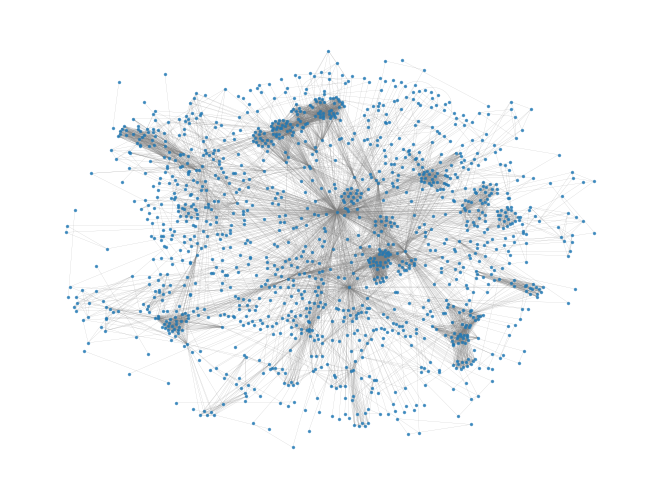

In [27]:
k_value = 0.2  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_en, k=k_value)

# Draw the graph with specified layout
nx.draw(G_en,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

### Network for Dutch Instagram

In [28]:
dfins_nl["caption_hashtags"] = dfins_nl["caption_hashtags"].apply(lambda x: ast.literal_eval(x) if x else "")
dfinshas_nl = dfins_nl[dfins_nl["caption_hashtags"].apply(lambda x: bool(x))].reset_index(drop=True)

In [29]:
G_nl = nx.Graph()
for words_list in dfinshas_nl['caption_hashtags']:
    G_nl.add_edges_from([(word1, word2) for i, word1 in enumerate(words_list) for j, word2 in enumerate(words_list) if i < j])

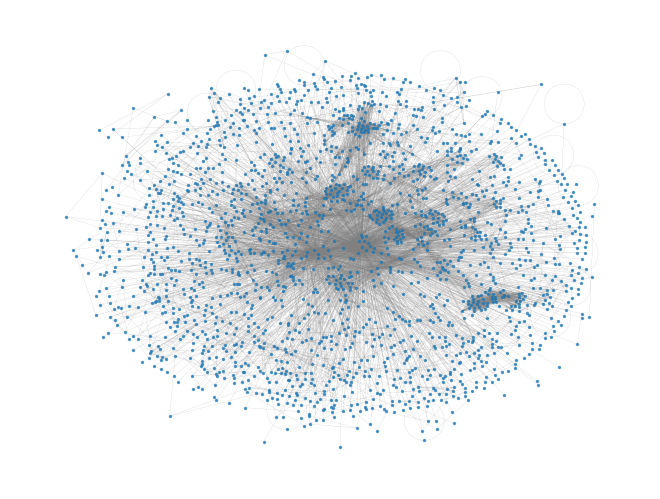

In [30]:
k_value = 0.2  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_nl, k=k_value)

# Draw the graph with specified layout
nx.draw(G_nl,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

### Network for English TikTok

In [31]:
dftt_en["hashtag_names"] = dftt_en["hashtag_names"].apply(lambda x: ast.literal_eval(x) if x else "")
dftthas_en = dftt_en[dftt_en["hashtag_names"].apply(lambda x: bool(x))].reset_index(drop=True)

In [32]:
G_en = nx.Graph()
for words_list in dftthas_en['hashtag_names']:
    G_en.add_edges_from([(word1, word2) for i, word1 in enumerate(words_list) for j, word2 in enumerate(words_list) if i < j])

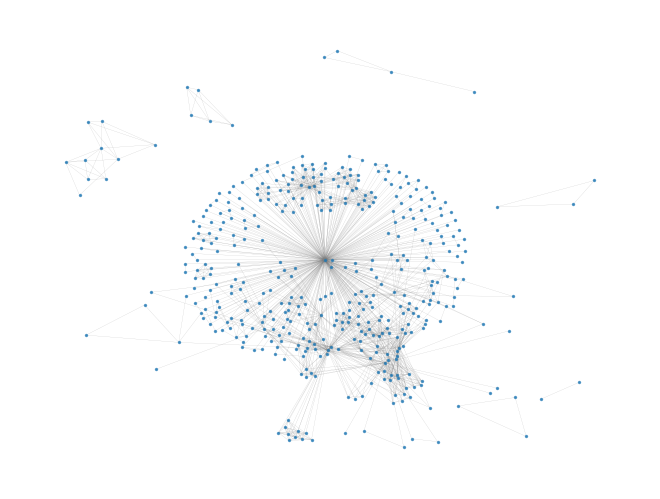

In [33]:
k_value = 0.2  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_en, k=k_value)

# Draw the graph with specified layout
nx.draw(G_en,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

### Network for Dutch TikTok

In [34]:
dftt_nl["hashtag_names"] = dftt_nl["hashtag_names"].apply(lambda x: ast.literal_eval(x) if x else "")
dftthas_nl = dftt_nl[dftt_nl["hashtag_names"].apply(lambda x: bool(x))].reset_index(drop=True)

In [35]:
G_nl = nx.Graph()
for words_list in dftthas_nl['hashtag_names']:
    G_nl.add_edges_from([(word1, word2) for i, word1 in enumerate(words_list) for j, word2 in enumerate(words_list) if i < j])

In [36]:
len(G_nl.nodes())

631

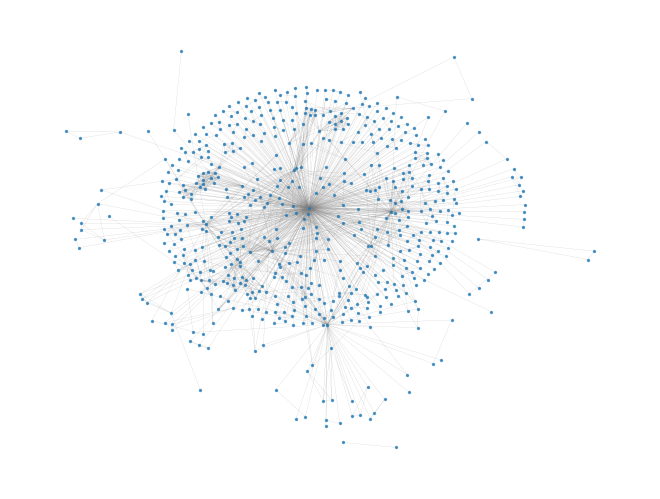

In [37]:
k_value = 0.2  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_nl, k=k_value)

# Draw the graph with specified layout
nx.draw(G_nl,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

### Network for English YouTube

In [38]:
# Convert string representations of tags into lists
dfyt_en["tags"] = dfyt_en["tags"].apply(lambda x: [tag.strip() for tag in x.split(",")] if x else [])

# Filter out rows where the "tags" column is empty
dfythas_en = dfyt_en[dfyt_en["tags"].apply(lambda x: bool(x))].reset_index(drop=True)

In [39]:
sample_size = 200
random_sample = dfythas_en.sample(n=sample_size, random_state=42)

In [40]:
G_en = nx.Graph()
for words_list in random_sample['tags']:
    G_en.add_edges_from([(word1, word2) for i, word1 in enumerate(words_list) for j, word2 in enumerate(words_list) if i < j])

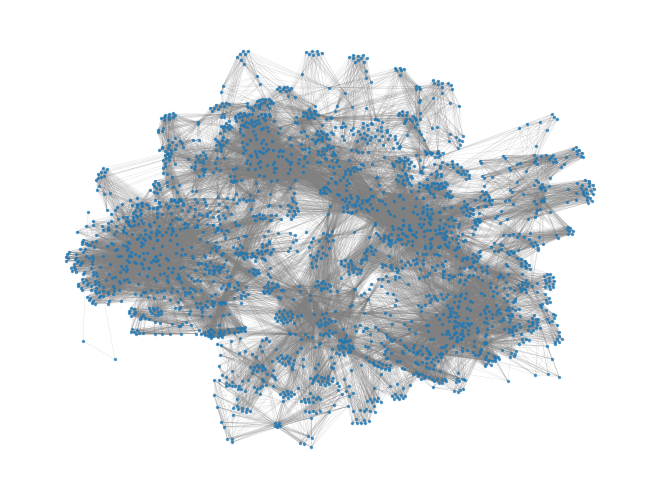

In [41]:
k_value = 0.2  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_en, k=k_value)

# Draw the graph with specified layout
nx.draw(G_en,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

### Network for Dutch YouTube

In [42]:
# Convert string representations of tags into lists
dfyt_nl["tags"] = dfyt_nl["tags"].apply(lambda x: [tag.strip() for tag in x.split(",")] if x else [])

# Filter out rows where the "tags" column is empty
dfythas_nl = dfyt_nl[dfyt_nl["tags"].apply(lambda x: bool(x))].reset_index(drop=True)

In [43]:
sample_size = 500
random_sample = dfythas_nl.sample(n=sample_size, random_state=42)

In [44]:
G_nl = nx.Graph()
for words_list in random_sample['tags']:
    G_nl.add_edges_from([(word1, word2) for i, word1 in enumerate(words_list) for j, word2 in enumerate(words_list) if i < j])

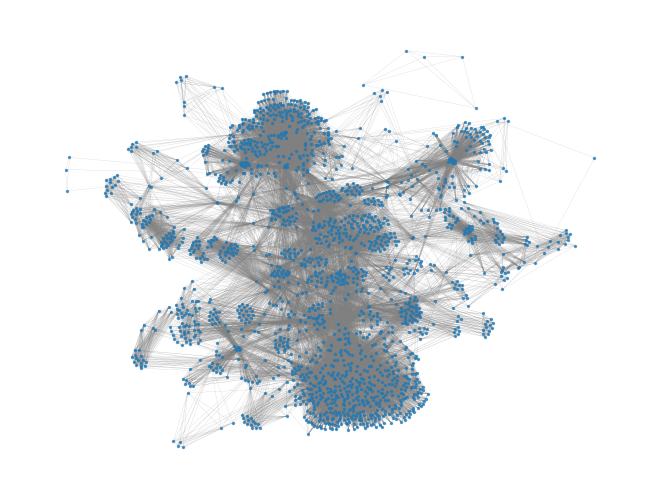

In [45]:
k_value = 0.2  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_nl, k=k_value)

# Draw the graph with specified layout
nx.draw(G_nl,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

## English Instagram Tags Network

In [46]:
dfins_en["tagged_users"] = dfins_en["tagged_users"].apply(lambda x: ast.literal_eval(x) if x else "")
dfinshas_en = dfins_en[dfins_en["tagged_users"].apply(lambda x: bool(x))].reset_index(drop=True)

In [47]:
G_en = nx.Graph()

# Assuming 'tagged_users' is a DataFrame column containing lists of words in each row
for i, row1 in dfinshas_en.iterrows():
    for j, row2 in dfinshas_en.iterrows():
        if i < j:
            # Check if there is any common word between the two rows
            common_words = set(row1['tagged_users']) & set(row2['tagged_users'])
            if common_words:
                G_en.add_edge(i, j, common_words=list(common_words))

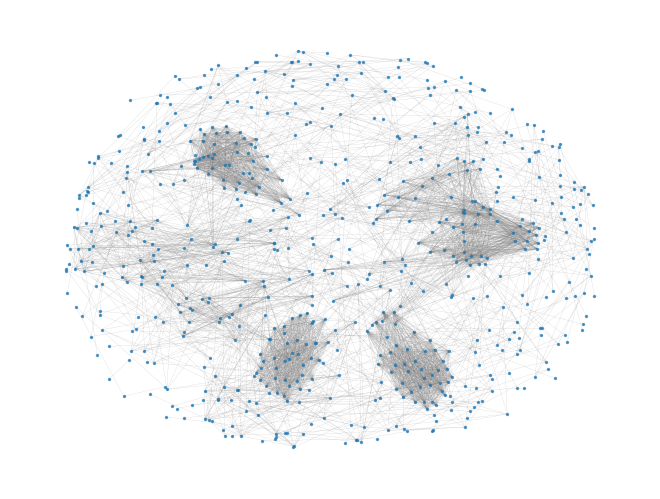

In [48]:
k_value = 0.5  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_en, k=k_value)

# Draw the graph with specified layout
nx.draw(G_en,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

## Dutch Instagram Tags Network

In [49]:
dfins_nl["tagged_users"] = dfins_nl["tagged_users"].apply(lambda x: ast.literal_eval(x) if x else "")
dfinshas_nl = dfins_nl[dfins_nl["tagged_users"].apply(lambda x: bool(x))].reset_index(drop=True)

In [50]:
G_nl = nx.Graph()

# Assuming 'tagged_users' is a DataFrame column containing lists of words in each row
for i, row1 in dfinshas_nl.iterrows():
    for j, row2 in dfinshas_nl.iterrows():
        if i < j:
            # Check if there is any common word betwenl the two rows
            common_words = set(row1['tagged_users']) & set(row2['tagged_users'])
            if common_words:
                G_nl.add_edge(i, j, common_words=list(common_words))

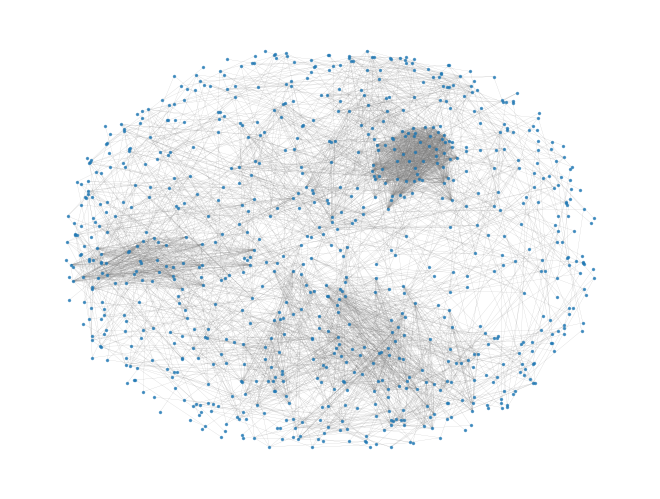

In [51]:
k_value = 0.5  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_nl, k=k_value)

# Draw the graph with specified layout
nx.draw(G_nl,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

## English TikTok Tags Network

In [52]:
# Convert string representations of tags into lists
dftt_en["tagged_user"] = dftt_en["tagged_user"].apply(lambda x: [tag.strip() for tag in x.split(",")] if x else [])

# Filter out rows where the "tags" column is empty
dftttag_en = dftt_en[dftt_en["tagged_user"].apply(lambda x: bool(x))].reset_index(drop=True)

In [53]:
G_en = nx.Graph()

# Assuming 'tagged_users' is a DataFrame column containing lists of words in each row
for i, row1 in dftttag_en.iterrows():
    for j, row2 in dftttag_en.iterrows():
        if i < j:
            # Check if there is any common word between the two rows
            common_words = set(row1['tagged_user']) & set(row2['tagged_user'])
            if common_words:
                G_en.add_edge(i, j, common_words=list(common_words))

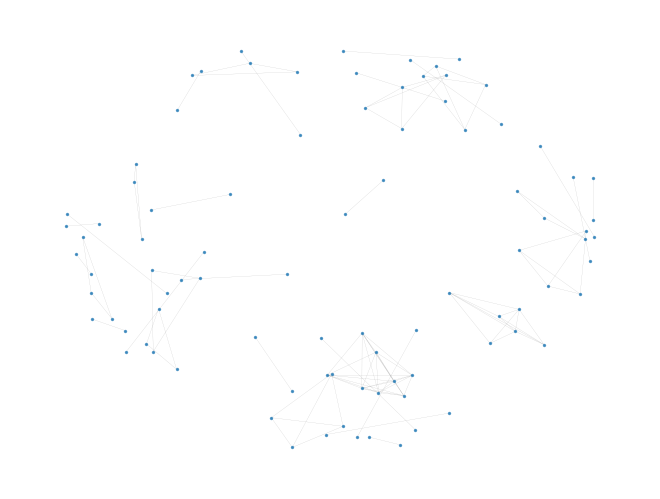

In [54]:
k_value = 0.5  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_en, k=k_value)

# Draw the graph with specified layout
nx.draw(G_en,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

## Dutch TikTok Tags Network

In [55]:
# Convert string represnlltations of tags into lists
dftt_nl["tagged_user"] = dftt_nl["tagged_user"].apply(lambda x: [tag.strip() for tag in x.split(",")] if x else [])

# Filter out rows where the "tags" column is empty
dftttag_nl = dftt_nl[dftt_nl["tagged_user"].apply(lambda x: bool(x))].reset_index(drop=True)

In [56]:
G_nl = nx.Graph()

# Assuming 'tagged_users' is a DataFrame column containing lists of words in each row
for i, row1 in dftttag_nl.iterrows():
    for j, row2 in dftttag_nl.iterrows():
        if i < j:
            # Check if there is any common word betwenl the two rows
            common_words = set(row1['tagged_user']) & set(row2['tagged_user'])
            if common_words:
                G_nl.add_edge(i, j, common_words=list(common_words))

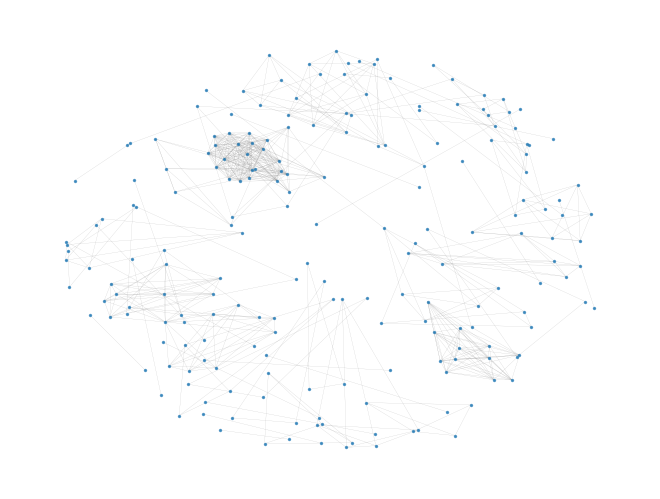

In [57]:
k_value = 0.5  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_nl, k=k_value)

# Draw the graph with specified layout
nx.draw(G_nl,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

## English YouTube Tags Network

In [58]:
# Convert string representations of tags into lists
dfyt_en["tagged_user"] = dfyt_en["tagged_user"].apply(lambda x: [tag.strip() for tag in x.split(",")] if x else [])

# Filter out rows where the "tags" column is empty
dfyttag_en = dfyt_en[dfyt_en["tagged_user"].apply(lambda x: bool(x))].reset_index(drop=True)

In [59]:
G_en = nx.Graph()

# Assuming 'tagged_users' is a DataFrame column containing lists of words in each row
for i, row1 in dfyttag_en.iterrows():
    for j, row2 in dfyttag_en.iterrows():
        if i < j:
            # Check if there is any common word between the two rows
            common_words = set(row1['tagged_user']) & set(row2['tagged_user'])
            if common_words:
                G_en.add_edge(i, j, common_words=list(common_words))

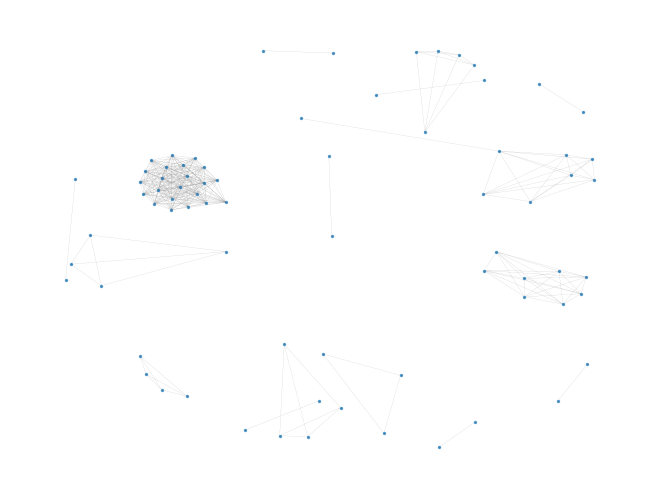

In [60]:
k_value = 0.5  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_en, k=k_value)

# Draw the graph with specified layout
nx.draw(G_en,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

## Dutch YouTube Tags Network

In [61]:
# Convert string represnltations of tags into lists
dfyt_nl["tagged_user"] = dfyt_nl["tagged_user"].apply(lambda x: [tag.strip() for tag in x.split(",")] if x else [])

# Filter out rows where the "tags" column is empty
dfyttag_nl = dfyt_nl[dfyt_nl["tagged_user"].apply(lambda x: bool(x))].reset_index(drop=True)

In [62]:
G_nl = nx.Graph()

# Assuming 'tagged_users' is a DataFrame column containing lists of words in each row
for i, row1 in dfyttag_nl.iterrows():
    for j, row2 in dfyttag_nl.iterrows():
        if i < j:
            # Check if there is any common word betwenl the two rows
            common_words = set(row1['tagged_user']) & set(row2['tagged_user'])
            if common_words:
                G_nl.add_edge(i, j, common_words=list(common_words))

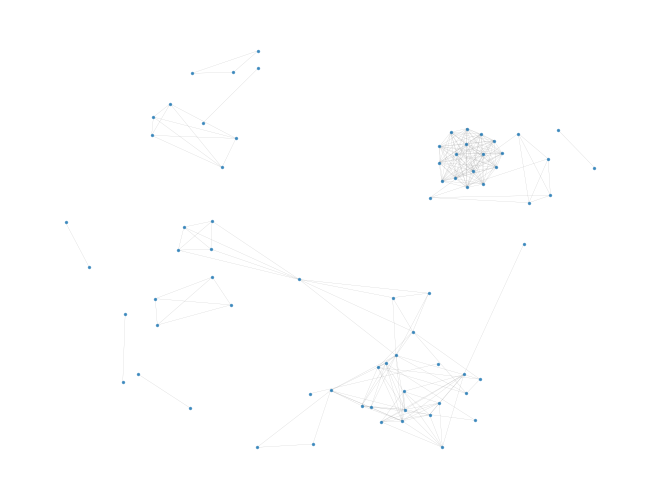

In [63]:
k_value = 0.5  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_nl, k=k_value)

# Draw the graph with specified layout
nx.draw(G_nl,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

In [128]:
# English Instagram
infcharins_en = pd.DataFrame()
infcharins_en["username"] = dfins_en["username"].unique()
ic.calculate_post_count(dfins_en, infcharins_en, "username")
ic.calculate_avg_hashtag_per_post(dfins_en, infcharins_en, "username", "caption_hashtags")
ic.calculate_sd_hashtag_per_post(dfins_en, infcharins_en, "username", "caption_hashtags")
ic.calculate_avg_tag_per_post(dfins_en, infcharins_en, "username", "tagged_users")
ic.calculate_sd_tag_per_post(dfins_en, infcharins_en, "username", "tagged_users")
ic.calculate_avg_caption_length_per_user(dfins_en, infcharins_en, "username", "caption")
ic.calculate_sd_caption_length_per_user(dfins_en, infcharins_en, "username", "caption")

# Dutch Instagram
infcharins_nl = pd.DataFrame()
infcharins_nl["username"] = dfins_nl["username"].unique()
ic.calculate_post_count(dfins_nl, infcharins_nl, "username")
ic.calculate_avg_hashtag_per_post(dfins_nl, infcharins_nl, "username", "caption_hashtags")
ic.calculate_sd_hashtag_per_post(dfins_nl, infcharins_nl, "username", "caption_hashtags")
ic.calculate_avg_tag_per_post(dfins_nl, infcharins_nl, "username", "tagged_users")
ic.calculate_sd_tag_per_post(dfins_nl, infcharins_nl, "username", "tagged_users")
ic.calculate_avg_caption_length_per_user(dfins_nl, infcharins_nl, "username", "caption")
ic.calculate_sd_caption_length_per_user(dfins_nl, infcharins_nl, "username", "caption")

# English TikTok
infchartt_en = pd.DataFrame()
infchartt_en["username"] = dftt_en["username"].unique()
ic.calculate_post_count(dftt_en, infchartt_en, "username")
ic.calculate_avg_hashtag_per_post(dftt_en, infchartt_en, "username", "hashtag_names")
ic.calculate_sd_hashtag_per_post(dftt_en, infchartt_en, "username", "hashtag_names")
ic.calculate_avg_tag_per_post(dftt_en, infchartt_en, "username", "tagged_user")
ic.calculate_sd_tag_per_post(dftt_en, infchartt_en, "username", "tagged_user")
ic.calculate_avg_caption_length_per_user(dftt_en, infchartt_en, "username", "video_description")
ic.calculate_sd_caption_length_per_user(dftt_en, infchartt_en, "username", "video_description")

# Dutch TikTok
infchartt_nl = pd.DataFrame()
infchartt_nl["username"] = dftt_nl["username"].unique()
ic.calculate_post_count(dftt_nl, infchartt_nl, "username")
ic.calculate_avg_hashtag_per_post(dftt_nl, infchartt_nl, "username", "hashtag_names")
ic.calculate_sd_hashtag_per_post(dftt_nl, infchartt_nl, "username", "hashtag_names")
ic.calculate_avg_tag_per_post(dftt_nl, infchartt_nl, "username", "tagged_user")
ic.calculate_sd_tag_per_post(dftt_nl, infchartt_nl, "username", "tagged_user")
ic.calculate_avg_caption_length_per_user(dftt_nl, infchartt_nl, "username", "video_description")
ic.calculate_sd_caption_length_per_user(dftt_nl, infchartt_nl, "username", "video_description")

# English YouTube
infcharyt_en = pd.DataFrame()
infcharyt_en["username"] = dfyt_en["channel_title"].unique()
ic.calculate_post_count(dfyt_en, infcharyt_en, "channel_title")
ic.calculate_avg_hashtag_per_post(dfyt_en, infcharyt_en, "channel_title", "tags")
ic.calculate_sd_hashtag_per_post(dfyt_en, infcharyt_en, "channel_title", "tags")
ic.calculate_avg_tag_per_post(dfyt_en, infcharyt_en, "channel_title", "tagged_user")
ic.calculate_sd_tag_per_post(dfyt_en, infcharyt_en, "channel_title", "tagged_user")
ic.calculate_avg_caption_length_per_user(dfyt_en, infcharyt_en, "channel_title", "description_video")
ic.calculate_sd_caption_length_per_user(dfyt_en, infcharyt_en, "channel_title", "description_video")

# Dutch YouTube
infcharyt_nl = pd.DataFrame()
infcharyt_nl["username"] = dfyt_nl["channel_title"].unique()
ic.calculate_post_count(dfyt_nl, infcharyt_nl, "channel_title")
ic.calculate_avg_hashtag_per_post(dfyt_nl, infcharyt_nl, "channel_title", "tags")
ic.calculate_sd_hashtag_per_post(dfyt_nl, infcharyt_nl, "channel_title", "tags")
ic.calculate_avg_tag_per_post(dfyt_nl, infcharyt_nl, "channel_title", "tagged_user")
ic.calculate_sd_tag_per_post(dfyt_nl, infcharyt_nl, "channel_title", "tagged_user")
ic.calculate_avg_caption_length_per_user(dfyt_nl, infcharyt_nl, "channel_title", "description_video")
ic.calculate_sd_caption_length_per_user(dfyt_nl, infcharyt_nl, "channel_title", "description_video")